# Employee salary prediction

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('adult3.csv')

In [3]:
data.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [5]:
data.tail(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
data.isnull()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
data['gender'].value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [9]:
data['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [10]:
data['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [11]:
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [12]:
# data.replace({'?':'other'},inplace=True)

In [13]:
data['occupation'].replace({'?':'other'},inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4660\3915674287.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['occupation'].replace({'?':'other'},inplace=True)


In [14]:
data['workclass'].replace({'?':'NotListed'},inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4660\3191512893.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].replace({'?':'NotListed'},inplace=True)


In [15]:
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
NotListed            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [16]:
data=data[data['workclass'] != 'Without-pay']

In [17]:
data=data[data['workclass'] != 'Never-worked']

In [18]:
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
NotListed            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [19]:
data['education'].value_counts()

education
HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [20]:
data.shape

(48811, 15)

In [21]:
data=data[data['education'] !='5th-6th' ]
data=data[data['education'] !='1st-4th' ]
data=data[data['education'] !='Preschool']

In [22]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NotListed,103497,Some-college,10,Never-married,other,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [23]:
print(data['education'].value_counts())

education
HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
Name: count, dtype: int64


In [24]:
data.shape

(47972, 15)

In [25]:
# redenduncy


In [26]:
data=data.drop(columns=['education'],axis=1)

In [27]:
import matplotlib.pyplot as plt

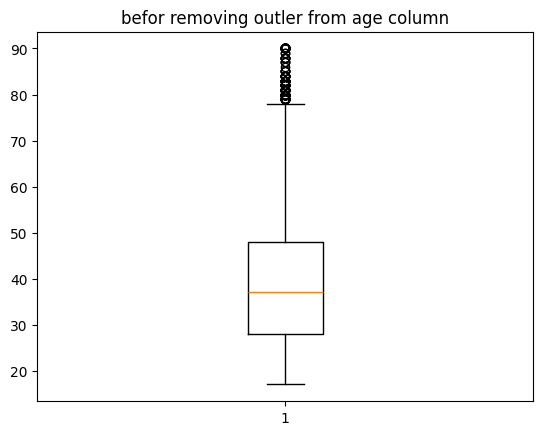

In [28]:
plt.title('befor removing outler from age column')
plt.boxplot(data['age'])
plt.show()

In [29]:
# outler remove from age column
data=data[(data['age']<=75) & (data['age']>=17)]

In [30]:
data.head(1)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K


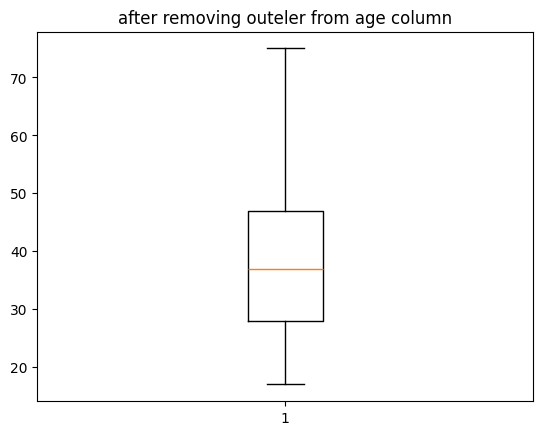

In [31]:
plt.title('after removing outeler from age column')
plt.boxplot(data['age'])
plt.show()

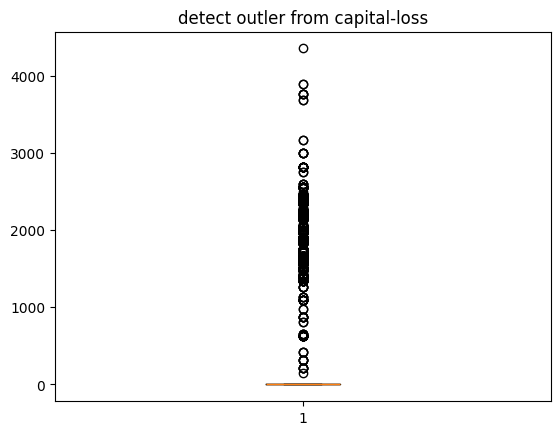

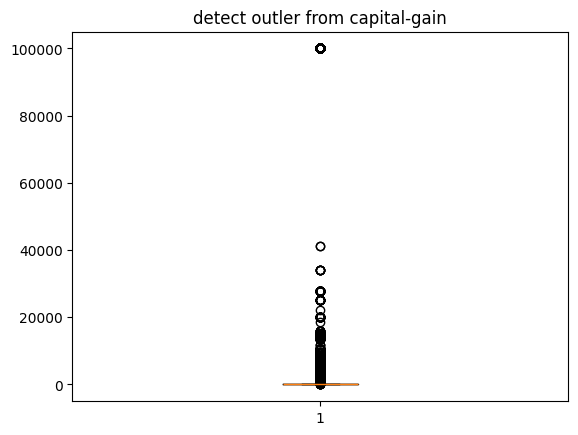

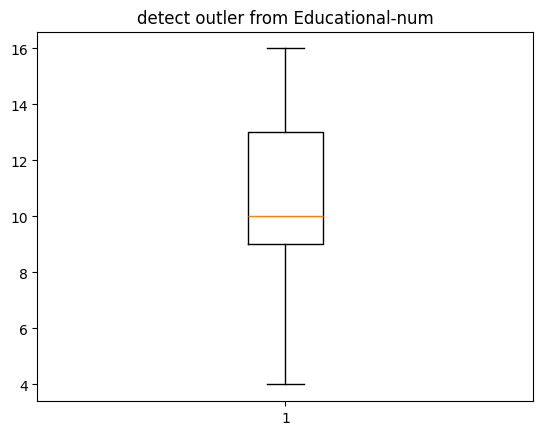

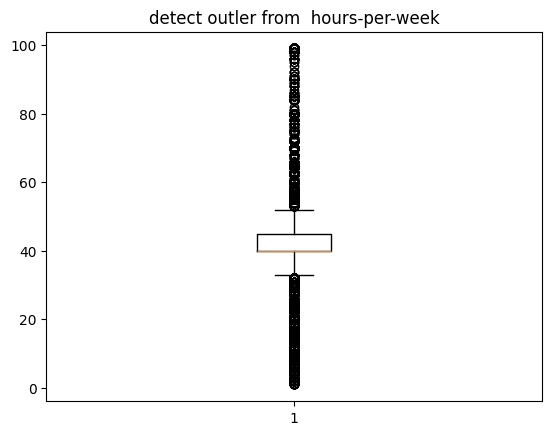

In [32]:
plt.title('detect outler from capital-loss')
plt.boxplot(data['capital-loss'])
plt.show()

plt.title('detect outler from capital-gain')
plt.boxplot(data['capital-gain'])
plt.show()

plt.title('detect outler from Educational-num')
plt.boxplot(data['educational-num'])
plt.show()

plt.title('detect outler from  hours-per-week')
plt.boxplot(data['hours-per-week'])
plt.show()


In [33]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['workclass']=encoder.fit_transform(data['workclass'])
data['marital-status']=encoder.fit_transform(data['marital-status'])
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])
data['race']=encoder.fit_transform(data['race'])
data['gender']=encoder.fit_transform(data['gender'])
data['native-country']=encoder.fit_transform(data['native-country'])


In [34]:
data.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,10,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,4,14,3,4,0,0,0,30,39,<=50K


In [35]:
data['income']=encoder.fit_transform(data['income'])

In [36]:
data.head(5)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,0
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,0
2,28,1,336951,12,2,10,0,4,1,0,0,40,39,1
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,1
4,18,2,103497,10,4,14,3,4,0,0,0,30,39,0


In [37]:
# split data 
x=data.drop(columns=['income']) #income
y=data['income']

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [40]:
models={
    'lr':LogisticRegression(),
    'randomfc':RandomForestClassifier(),
    'kneighbor':KNeighborsClassifier(),
    'svm':SVC(),
    'gbc':GradientBoostingClassifier()
}

result={}
for name , model in models.items():
    pipe=Pipeline([
       ('scaler',StandardScaler()),
        ('model',model)
    ])
    
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    result[name]=acc
    print(f'name :{name},accuracy :{acc:.4f}')
    print(classification_report(y_test,y_pred))


name :lr,accuracy :0.8283
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7277
           1       0.70      0.47      0.56      2247

    accuracy                           0.83      9524
   macro avg       0.78      0.70      0.73      9524
weighted avg       0.82      0.83      0.82      9524

name :randomfc,accuracy :0.8647
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      7277
           1       0.75      0.65      0.69      2247

    accuracy                           0.86      9524
   macro avg       0.82      0.79      0.80      9524
weighted avg       0.86      0.86      0.86      9524

name :kneighbor,accuracy :0.8340
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      7277
           1       0.66      0.60      0.63      2247

    accuracy                           0.83      9524
   macro avg       0.77      0.75    

In [41]:
print(result.keys(),result.values())

dict_keys(['lr', 'randomfc', 'kneighbor', 'svm', 'gbc']) dict_values([0.8283284334313313, 0.8646577068458631, 0.8339983200335993, 0.8562578748425032, 0.870957580848383])


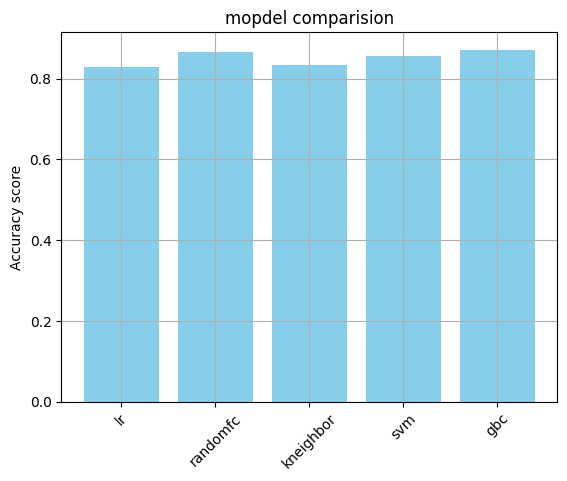

In [42]:
plt.bar(result.keys(),result.values(),color='skyblue')
plt.ylabel('Accuracy score')
plt.title('mopdel comparision')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [43]:
import joblib
models={
    'lr':LogisticRegression(),
    'randomfc':RandomForestClassifier(),
    'kneighbor':KNeighborsClassifier(),
    'svm':SVC(),
    'gbc':GradientBoostingClassifier()
}

result={}
for name , model in models.items():
    pipe=Pipeline([
       ('scaler',StandardScaler()),
        ('model',model)
    ])
    
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    result[name]=acc
    print(f'name :{name},accuracy :{acc:.4f}')
    print(classification_report(y_test,y_pred))
# get best model 
best_model_name=max(result,key=result.get)
best_model=models[best_model_name]
print(f'/n model name :{best_model_name} ,with accuracy:{result[best_model_name]:.4f}')
# save model
joblib.dump(best_model,'best_model.pk1')
print('save best model as best_model.pk1 ')

name :lr,accuracy :0.8283
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7277
           1       0.70      0.47      0.56      2247

    accuracy                           0.83      9524
   macro avg       0.78      0.70      0.73      9524
weighted avg       0.82      0.83      0.82      9524

name :randomfc,accuracy :0.8649
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7277
           1       0.75      0.65      0.69      2247

    accuracy                           0.86      9524
   macro avg       0.82      0.79      0.80      9524
weighted avg       0.86      0.86      0.86      9524

name :kneighbor,accuracy :0.8340
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      7277
           1       0.66      0.60      0.63      2247

    accuracy                           0.83      9524
   macro avg       0.77      0.75    

In [44]:
%%writefile app.py
import matplotlib.pyplot as plt
import pandas as pd 
import os
import threading
import streamlit as st


model = joblib.load('best_model.pk1')
st.set_page_config(page_title='Employee salary Classification',page_icon='E',layout='Centered')
st.title('Employee Salary Classification App')
st.markdown('Predict wether an employee earn >50k or <=50k based on input ')
st.sidenar.header('Employee Details ')
st.sidebar.slider('age',23,68,45)
st.sidebar.selectbox('Education lebel',['HS-school','Degree','Master','Ph-D','A.S.C.O'])
st.sidebar.selectbox('job-Role',['Tech-support','craft-repair','other-service ','Sales','Exes-Managerial','Prof-specialty','Handler-cleaner',
                                'm/c-op-inspect','Farming-fishing','Transport-moving','priya-house-service'])
#buiuld input data frame must match to your data set
hour_per_week=st.sidebar.slider('Hoyurs per week',1,80,40)
Exprience = st.sidebar.slider('Year of exprience':0,40,4)
input_df=pd.DataFrame([
    'age':[age],
    'education':[education],
    'occupation':[occupation],
    'houer-per-week':[hours_per_week],
    'exprience':[exprience]
])
st.write('### input data')
st.write(input_df)
# predict button
if st.button('Predict Salary Class'):
    prediction=model.predict(input_df)
    st.success(f'prediction:',{prediction[0]})

#batch prediction
st.markdown("----")
st.markdown("### batch prediction")
uploaded_file = st.file_uploader('upload a csv file for batch prediction ',type='csv')


if uploaded_file is not None:
    batch_data=pd.read_csv(uploaded_file)
    st.write('uploaded data preview ',batch_data.head())
    batch_preds=model.predict(batch_data)
    batch_data['PredictedClass']=batch_preds
    st.write('Prediction:')
    st.write(batch_data.head())
    csv=batch_data.to_csv(index=False).encode('utf-8')
    st.download_button('Download Predictions CSV',csv,file_name='predicted_classes.csv',mime='text/csv')
    

Overwriting app.py


In [45]:
!ngrok authtoken 30BO5G5HjrLY19tcxE37pblhRVZ_7cMnQw5z9oyQghsp12Wkf

Authtoken saved to configuration file: C:\Users\Admin\AppData\Local/ngrok/ngrok.yml


In [46]:

!ngrok config add-authtoken 30BO5G5HjrLY19tcxE37pblhRVZ_7cMnQw5z9oyQghsp12Wkf

Authtoken saved to configuration file: C:\Users\Admin\AppData\Local/ngrok/ngrok.yml


In [47]:
import os 
import threading
def run_streamlit():
    os.system('streamlit  run app.py --server.port 8501')

thread=threading.Thread(target=run_streamlit)
thread.start()

In [48]:
from pyngrok import ngrok
import time 

# wait for fiew second  to make sure streamlit port 8501
time.sleep(10)
public_url=ngrok.connect(8501)

print('Your Streamlit is live here:',public_url)

Your Streamlit is live here: NgrokTunnel: "https://320b76ddbed1.ngrok-free.app" -> "http://localhost:8501"
